In [1]:
# IPython magic to import matplotlib and plot inline
%matplotlib inline

# Introduction to FEniCS

[FEniCS](https://fenicsproject.org/) is a open-source computing platform for solving partial differential equations (PDEs). 
The FEniCS Project consists of a number of components with DOLFIN and UFL providing the main user interface. For Detailed documentation of the FEniCS programming interface and its components, see the links on https://fenics.readthedocs.io/en/latest/.


[The FEniCS Book](https://link.springer.com/book/10.1007%2F978-3-642-23099-8) provides an overview of the finite element method, its implementation in FEniCS and application examples.
[The FEniCS Tutorial](https://fenicsproject.org/tutorial/) is a collection of example problems for learning FEniCS 'by examples'. 
Source code for the examples used this book can be found [here](https://github.com/hplgit/fenics-tutorial/tree/master/src/vol1/python).
Other examples can be found in the [DOLFIN documentation](https://fenicsproject.org/docs/dolfin/latest/python/demos.html).

Be aware that FEniCS is under development and unfortunately some class and function names of the current version may differ from those in the tutorials...

This notebook assumes FEniCS/Dolfin version `2019.1.0`. 

You are running this notebook with version:

In [2]:
from dolfin import __version__ as dolfin_version
print("Your Dolfin version: ", dolfin_version)

Your Dolfin version:  2019.1.0


## Getting Started

- Follow the instructions in the *README.md* file in this repository to set up a running fenics installation.
- Skim read section 1 of [The FEniCS Tutorial](https://fenicsproject.org/pub/tutorial/html/._ftut1003.html#ch:prelim)
- Work through this notebook. This will give you a quick overview of the basic building blocks of any FEniCS program, and introduce an example how PDE problems can be solved in FEniCS. 
- Then, read and follow the examples of section 2 in [The FEniCS Tutorial](https://fenicsproject.org/pub/tutorial/html/._ftut1004.html#ch:fundamentals). You will already be familiar with many of the concepts, but they will be explained in more detail.

After this, you are ready to explore any of the other examples in the tutorial.
Particularly relevant for your projects are:
- [Linear Elasticity](https://fenicsproject.org/pub/tutorial/html/._ftut1008.html#ftut:elast) example in the tutorial.
- [Hyperelasticity](https://fenicsproject.org/docs/dolfin/1.4.0/python/demo/documented/hyperelasticity/python/documentation.html) from the Dolfin reference. Note that this code is based on an outdated version of Dolfing/FEniCS, so a few adapatations will be necessary to make it run.




## Importing FEniCS libraries

In [3]:
from fenics import *

## Mesh Creation

FEniCS provides various [built-in meshes](https://fenicsproject.org/docs/dolfin/latest/python/demos/built-in-meshes/demo_built-in-meshes.py.html) for simple standard geometries.
Meshes for more complex geometries can be generated via [fenics-mshr](https://fenics.readthedocs.io/projects/mshr/en/latest/) / [CGAL](https://www.cgal.org).

In [4]:
mesh_2d = RectangleMesh(Point(0,0),Point(5,5), nx=3, ny=3)
# plotting via ipython 3d rendering 
mesh_2d
# or via matplotlib in 2d
#plot(mesh_2d)

A mesh consists of various 'entities' as detailed [here](https://fenicsproject.org/docs/dolfin/1.5.0/python/programmers-reference/cpp/mesh/Mesh.html).

In [5]:
print("Number of cells:    ", mesh_2d.num_cells())
print("Number of faces:    ", mesh_2d.num_faces())
print("Number of edges:    ", mesh_2d.num_edges())
print("Number of vertices: ", mesh_2d.num_vertices())

print("Coordinates: \n", mesh_2d.coordinates())

Number of cells:     18
Number of faces:     18
Number of edges:     33
Number of vertices:  16
Coordinates: 
 [[0.         0.        ]
 [1.66666667 0.        ]
 [3.33333333 0.        ]
 [5.         0.        ]
 [0.         1.66666667]
 [1.66666667 1.66666667]
 [3.33333333 1.66666667]
 [5.         1.66666667]
 [0.         3.33333333]
 [1.66666667 3.33333333]
 [3.33333333 3.33333333]
 [5.         3.33333333]
 [0.         5.        ]
 [1.66666667 5.        ]
 [3.33333333 5.        ]
 [5.         5.        ]]


In [6]:
for cell in cells(mesh_2d):
    print("-cell", cell.index(), "has faces :", cell.entities(2)) # cell and faces are identical in 2d
                                                                  # try this on a 3d mesh  
    for face in faces(cell):
        print(" -face", face.index(), "has edges :", face.entities(1)) 
        for edge in edges(face):
            print("  -edge", edge.index(), "has vertices :", edge.entities(0)) 

-cell 0 has faces : []
 -face 0 has edges : [4 2 0]
  -edge 4 has vertices : [1 5]
  -edge 2 has vertices : [0 5]
  -edge 0 has vertices : [0 1]
-cell 1 has faces : [1]
 -face 1 has edges : [10  2  1]
  -edge 10 has vertices : [4 5]
  -edge 2 has vertices : [0 5]
  -edge 1 has vertices : [0 4]
-cell 2 has faces : [2]
 -face 2 has edges : [7 5 3]
  -edge 7 has vertices : [2 6]
  -edge 5 has vertices : [1 6]
  -edge 3 has vertices : [1 2]
-cell 3 has faces : [3]
 -face 3 has edges : [13  5  4]
  -edge 13 has vertices : [5 6]
  -edge 5 has vertices : [1 6]
  -edge 4 has vertices : [1 5]
-cell 4 has faces : [4]
 -face 4 has edges : [9 8 6]
  -edge 9 has vertices : [3 7]
  -edge 8 has vertices : [2 7]
  -edge 6 has vertices : [2 3]
-cell 5 has faces : [5]
 -face 5 has edges : [16  8  7]
  -edge 16 has vertices : [6 7]
  -edge 8 has vertices : [2 7]
  -edge 7 has vertices : [2 6]
-cell 6 has faces : [6]
 -face 6 has edges : [14 12 10]
  -edge 14 has vertices : [5 9]
  -edge 12 has vertices :

In [7]:
mesh_3d = BoxMesh(Point(0,0,0), Point(1,1,1), 5, 5, 5)
mesh_3d

In [8]:
# Save mesh in VTK format
file = File("mesh_3d.pvd");
file << mesh_3d;

Besides those simple geometries, we will use meshes created from medical images:

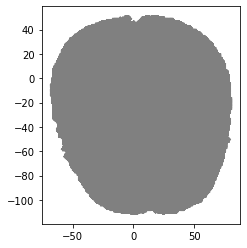

In [9]:
path_to_file = "data/domain_brain_2d.h5"
# load mesh from HDF5
mesh_brain_2d = Mesh()
hdf = HDF5File(mesh_brain_2d.mpi_comm(),  path_to_file, "r")
hdf.read(mesh_brain_2d, "/mesh", False)

# plotting via ipython 3d rendering (slow)
#mesh_brain_2d
# or via matplotlib in 2d
plot(mesh_brain_2d)

A mesh can be devided into subdomains:

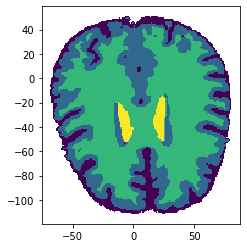

In [10]:
# we load the subdomains from the hdf file
subdomains = MeshFunction("size_t", mesh_brain_2d, mesh_brain_2d.geometry().dim())
hdf.read(subdomains, "/subdomains")

# and plot
plot(subdomains)

## Function Space

The [`FunctionSpace`](https://fenicsproject.org/docs/dolfin/1.5.0/python/programmers-reference/functions/functionspace/FunctionSpace.html) class represents a finite element function space that defines basis functions (shape functions) over a discretized domain.

In [11]:
V = FunctionSpace(mesh_2d, "Lagrange", 1)

A function space is linked to a particular element type:

In [12]:
ele = V.element()
ele.signature()

"FiniteElement('Lagrange', triangle, 1)"

The number of degrees of freedoms of each finite element depends on the element 'family' (e.g. Lagrange), degree of the element, as well as geometric dimensionality of the domain and dimensionality of the field of interest.

In [13]:
cell = next(cells(mesh_2d))           # a cell from the mesh
print("dofs: ",V.dofmap().dofs())     
                                                                
print("dof coordinates: \n",ele.tabulate_dof_coordinates(cell))  # dof coordinates for that cell  
                          
# change element type or degree

dofs:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
dof coordinates: 
 [[0.         0.        ]
 [0.         1.66666667]
 [1.66666667 1.66666667]]


A FunctionSpace over a mesh combines all finite elements of the domain:

In [14]:
V.tabulate_dof_coordinates()

array([[0.        , 5.        ],
       [0.        , 3.33333333],
       [1.66666667, 5.        ],
       [0.        , 1.66666667],
       [1.66666667, 3.33333333],
       [3.33333333, 5.        ],
       [0.        , 0.        ],
       [1.66666667, 1.66666667],
       [3.33333333, 3.33333333],
       [5.        , 5.        ],
       [1.66666667, 0.        ],
       [3.33333333, 1.66666667],
       [5.        , 3.33333333],
       [3.33333333, 0.        ],
       [5.        , 1.66666667],
       [5.        , 0.        ]])

The following function spaces exist:
- `FunctionSpace` for scalar fields
- `VectorFunctionSpace` for vector fields
- `TensorFunctionSpace` for tensor fields

In [15]:
U = VectorFunctionSpace(mesh_2d, "Lagrange", 1)
U.dofmap().dofs()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

# Functions

The [`Function`](https://fenicsproject.org/olddocs/dolfin/1.3.0/python/programmers-reference/cpp/function/Function.html) class represents a function in a finite element function space.

In [16]:
v = Function(V)

Functions can be created from analytical [expressions](https://fenicsproject.org/docs/dolfin/1.5.0/python/programmers-reference/functions/expression/Expression.html), by [projection](https://fenicsproject.org/docs/dolfin/1.5.0/python/programmers-reference/fem/projection/project.html) into a function space.

In [17]:
scalar_field_expression = Expression("exp( - pow(x[0]-x0, 2) / pow(sigma_x, 2) - pow(x[1]-y0, 2) / pow(sigma_y, 2) )", 
                                    x0=3, y0=3, sigma_x=1, sigma_y=1, 
                                    degree = 1)
scalar_field_discrete = project(scalar_field_expression, V)

Their values are defined at the integration points and interpolated at all other points according to the basis functions (elements family, degree) of their function space.

In [18]:
print("Values at integration points: \n",scalar_field_discrete.compute_vertex_values())

print("Value at arbitrary point (1.232, 3.434): ", scalar_field_discrete(1.232, 3.434))

Values at integration points: 
 [1.52299797e-08 2.08579001e-05 1.10431945e-04 2.26032941e-06
 2.08579001e-05 2.85655008e-02 1.51239760e-01 3.09558685e-03
 1.10431945e-04 1.51239760e-01 8.00737403e-01 1.63895538e-02
 2.26032941e-06 3.09558685e-03 1.63895538e-02 3.35462628e-04]
Value at arbitrary point (1.232, 3.434):  0.10287732297498928


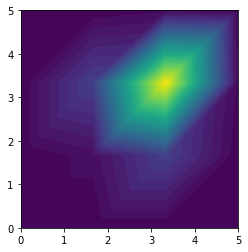

In [19]:
plot(scalar_field_discrete)

Similar for Vector fields and tensor fields

In [20]:
vector_field_expression = Expression( ("cos(x[0])", "sin(x[0])"), degree = 1)
vector_field_discrete = project(vector_field_expression, U)

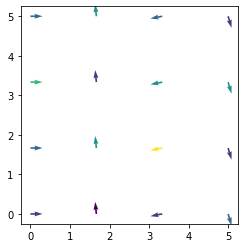

In [21]:
plot(vector_field_discrete, wireframe=True)
# for this to look prettier:
# - define a domain centered around (0,0)
# - increase the number of elements

## Solving PDEs 

Above, we have explored the basic components that are needed to define and discretize functions over arbitrarily shaped domains.
We are now going to see how to use these tools to solve partial differential equations with given boundary and initial conditions over these domains.

Consider a diffusion problem, such as the transport of heat in an isotropic homogeneous medium:

$$\frac{\partial \Theta}{\partial t} = - \alpha\, \nabla^2 \Theta\, ,$$
where $\Theta$ is the temperature and $\alpha$ a real coefficient called (thermal) diffusivity.

With 
- initial condition $\Theta(x, t=0) = \Theta_0$
- flux boundary condition $\frac{\partial \Theta}{\partial n}$ given

To solve this equation, we start by writing the weak form with test function $\nu$:
    

$$\int_\Omega \left( \frac{\partial \Theta}{\partial t}\right )\, \nu\, dV=  \alpha\, \int_\Omega \left( \nabla^2 \Theta \right)\, \nu\, dV \tag{1}$$ 


Using the chain rule theorem, the second term of above equation can be written as:

\begin{align}
 \alpha\int_\Omega \left( \nabla^2 \Theta \right)\, \nu\, dV  
&= \alpha \int_{\Omega} \nabla \cdot \left( \nu\, \nabla \Theta \right)\, dV - \alpha \int_\Omega \left(\nabla \nu \right) \cdot \left( \nabla \Theta \right)\, dV 
\end{align}

Applying the divergence theorem to the first term yields:

\begin{align}
\alpha \int_{\Omega} \nabla \cdot \left( \nu\, \nabla \Theta \right)\, dV
&= \alpha \int_{\partial\Omega} \nu \, \left( \nabla\, \Theta \right) \cdot \mathbf{n} \, dS 
\end{align}

Equation (1) now reads:

\begin{align}
\int_\Omega \left( \frac{\partial \Theta}{\partial t}\right )\, \nu\, dV= \alpha \int_{\partial\Omega} \nu \, \left( \nabla\, \Theta \right) \cdot \mathbf{n} \, dS - \alpha \int_\Omega \left(\nabla \nu \right) \cdot \left( \nabla \Theta \right)\, dV \tag{2}
\end{align}

where $\mathbf{n}$ is the outward facing unit vector on the domain boundary $\partial\Omega$. 
By construction $\nu \equiv 0$ on the parts of the boundary on which essential boundary conditions apply.

Therefore, the boundary integral only yields non-zero values where natural boundary conditions are applied.
These correspond to the von-Neuman boundary conditions that impose a value on the heatflux $q = \alpha\left(\nabla \Theta \right)\cdot\mathbf{n}$. 

Separating terms that depend on $\left(\Theta,\nu\right)$ and  $\left(\nu\right)$, respectively, yields:

\begin{align}
\int_\Omega \left( \frac{\partial \Theta}{\partial t}\right )\, \nu\, dV +  \alpha \int_\Omega \left(\nabla \nu \right) \cdot \left( \nabla \Theta \right)\, dV= \int_{\Gamma_{vN}} \nu \, q \, dS \tag{3}
\end{align}

We approximate the time derivative by a backward difference scheme:

$$\left(\frac{\partial \Theta}{\partial t}\right)^{k+1} \approx \frac{\Theta^{k+1} - \Theta^{k}}{\Delta t}$$

Equation (3) then becomes:

\begin{align}
\int_\Omega \frac{\Theta^{k+1} - \Theta^{k}}{\Delta t}\, \nu\, dV +  \alpha \int_\Omega \left(\nabla \nu \right) \cdot \left( \nabla \Theta^{k+1} \right)\, dV= \int_{\Gamma_{vN}} \nu \, q^{k+1} \, dS
\end{align}

Including the initial condition $\Theta_0$ and separating terms that depend on the unkown $\Theta^{k+1}$ yields:

\begin{align}
\Theta^0 &= \Theta(t=0) = \Theta_0 \tag{4}\\
\int_\Omega \Theta^{k+1}\, \nu\, dV +  \Delta t \, \alpha \int_\Omega \left(\nabla \nu \right) \cdot \left( \nabla \Theta^{k+1} \right)\, dV &= \Delta t\, \int_{\Gamma_{vN}} \nu \, q^{k+1} \, dS +  \int_\Omega \Theta^{k} \, \nu \, dV \tag{5} \
\end{align}

To translate this into FEniCS, we first need to define a mesh, a function space over this mesh and suitable functions:

In [22]:
# mesh & functionspace
mesh = RectangleMesh(Point(-5,-5),Point(5,5), nx=10, ny=10)
V = FunctionSpace(mesh, "Lagrange", 1)

# functions
T = TrialFunction(V) # temperature  (k+1)
v = TestFunction(V)  # test function
T_k= Function(V)     # temperature at previous time point (k)

# other parameters
q = Constant(0)     # assuming isolated boundaries, zero heatflux in/out of domain
alpha = Constant(1) # arbitrary value for thermal diffusivity
delta_t = 0.2


This allows us to encode equation (5):

In [23]:
a = T * v * dx + delta_t * alpha * inner(grad(v), grad(T)) * dx # a = a(T, v)
L = delta_t * v * q * ds + T_k * v * dx                         # L = L(v)

Additionally we need to specify initial and boundary conditions to find a unique solution to our problem.

In [24]:
# initial value
T_0_expression = Expression("exp( - pow(x[0]-x0, 2) / pow(sigma_x, 2) - pow(x[1]-y0, 2) / pow(sigma_y, 2) )", 
                                    x0=0, y0=0, sigma_x=5, sigma_y=5, 
                                    degree = 1)
T_0 = project(T_0_expression, V)

# Natural Boundary Conditions are encoded directly in the variational form
# -> heatflux q

# Essential boundary conditions can be specified separately:
# def boundary(x, on_boundary):
#     """
#     identifies boundary of the domain
#     """
#     return on_boundary
# bc = DirichletBC(V, u_D, boundary)


We can now solve the time-dependent PDE:

In [25]:
# Create VTK file for saving solution at each time step
vtkfile = File('output/temp_diffusion.pvd')

# Compute solution
T = Function(V)
T.rename("T", "Temperature")
t = 0
T_k.assign(T_0)    # assign initial condition
for k in range(10):
    
    # increment time
    t = t + delta_t
    
    # solve linear variation problem
    solve(a==L, T)
    
    # save to file
    vtkfile << (T, t)
    print("Time step %02d, t=%.2f: T(0,0)=%.2f"%(k, k*delta_t, T(0,0)))
    # update T_k with current solution
    T_k.assign(T) 

Time step 00, t=0.00: T(0,0)=0.97
Time step 01, t=0.20: T(0,0)=0.94
Time step 02, t=0.40: T(0,0)=0.91
Time step 03, t=0.60: T(0,0)=0.89
Time step 04, t=0.80: T(0,0)=0.86
Time step 05, t=1.00: T(0,0)=0.84
Time step 06, t=1.20: T(0,0)=0.82
Time step 07, t=1.40: T(0,0)=0.80
Time step 08, t=1.60: T(0,0)=0.78
Time step 09, t=1.80: T(0,0)=0.76


Temperature at center at t=0:     0.9999999999999999
Temperature at center at t=1.80:  0.7612013861310724


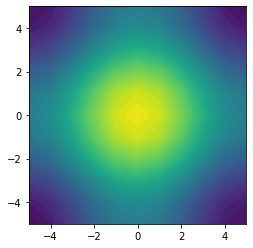

In [26]:
plot(T)
print("Temperature at center at t=0:    ", T_0(0,0))
print("Temperature at center at t=%.2f: "%(k*delta_t), T(0,0))

See this [tutorial](https://fenicsproject.org/pub/tutorial/html/._ftut1006.html) for a more extended version of this example.

The [`solve`](https://fenicsproject.org/olddocs/dolfin/1.3.0/python/programmers-reference/fem/solving/solve.html) command is a high-level call to solve a linear variation problem `a==L` or a linear system $Ax=b$.

Alternative ways to call the solver for *linear* problems, including manual assembly of the linear system, are discussed in this [tutorial](https://fenicsproject.org/pub/tutorial/html/._ftut1018.html#___sec121).
Solution of *non-linear* problems is briefly introduced [here](https://fenicsproject.org/pub/tutorial/html/._ftut1007.html#ftut1:gallery:nonlinearpoisson) and discussed in more detail [here](http://home.simula.no/~hpl/homepage/fenics-tutorial/release-1.0-nonabla/webm/nonlinear.html).